In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [2]:
# (a) Load data (features)
def load_data():
    data_array = np.load('features.npy')
    data = (data_array-data_array.mean(axis=0)) / data_array.std(axis=0)
    return data

In [3]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    data = load_data()
    covmat = np.cov(data.T)
    w,v = np.linalg.eig(covmat)
    sorted_eigenvalues_indicies = np.argsort(-w)
    sorted_eig_vals = w[sorted_eigenvalues_indicies]
    sorted_eig_vecs = np.zeros((8,8))
    for i in sorted_eigenvalues_indicies:
        sorted_eig_vecs[i,:] = v[:,i]
    return (sorted_eig_vals, sorted_eig_vecs)

In [4]:
# (c) Evaluate using variance_explained as the metric
def eval(k, data):
    val, vec = eigendecomp(data)
    eigval_sum = np.sum(val)
    variance = np.zeros(k)
    for i in range(k):
        variance[i] = np.sum(val[0:(i+1)])/eigval_sum
    return(variance)

In [6]:
dat = load_data()
var = eval(6, dat)
for i in range(len(var)):
    if i < 1: 
        print("Feature {} explains {}% variance.".format(i+1, (var[i]*100).round(4)))
    else:
        print("Features 1 to {} explains {}% variance.".format(i+1, (var[i]*100).round(4)))

Feature 1 explains 58.8921% variance.
Features 1 to 2 explains 87.399% variance.
Features 1 to 3 explains 97.0456% variance.
Features 1 to 4 explains 99.5807% variance.
Features 1 to 5 explains 100.0% variance.
Features 1 to 6 explains 100.0% variance.


In [20]:
# (d) Visualize after projecting to 2-D space
#Write a funcঞon that projects the original data to a 2-dimensional feature subspace.
#Load the labels from q1-data/labels.npy and plot the 2-D representaঞon as a scaer plot with labels as legends
#of the plot
def viz():
    labels = np.load('labels.npy')
    X = load_data()[:,0:2]
    # Plot points
    for i in range(len(X)):
        if labels[i] == 0:
            plt.scatter(X[:,0][i],X[:,1][i],color='orange')
        elif labels[i] == 1:
            plt.scatter(X[:,0][i],X[:,1][i],color='blue')
        elif labels[i] == 2:
            plt.scatter(X[:,0][i],X[:,1][i],color='green')    
        
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data in 2-D Space')
    plt.show
    

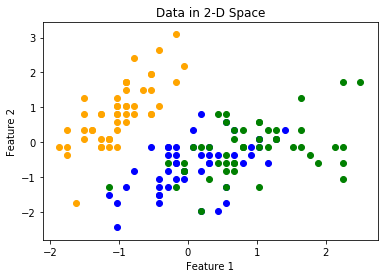

In [22]:
def main():
    dat = load_data()
    eval(4,dat)
    viz()

if __name__ == "__main__":
    main()

The covariance matrix will be 1000x1000. In order to improve performance, we can use pooling, such as mean,min,max pooling, in order to reduce the size of the covariance matrix and to reduce the number of features. This will improve the performance by speeding up the computation with minimal loss of information

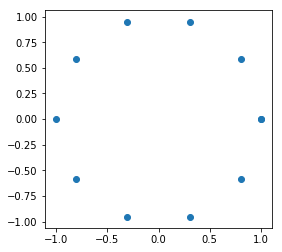

In [37]:
theta = np.linspace(0, 2*np.pi, 11)
r = np.sqrt(1)
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
fig, ax = plt.subplots(1)
ax.scatter(x1, x2)
ax.set_aspect(1)
plt.show()